<a href="https://colab.research.google.com/github/abhiramangit/Imag_reco/blob/master/Binary_Classification_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from copy import copy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook 
from sklearn.metrics import accuracy_score,log_loss,mean_squared_error

In [0]:
my_cmap = colors.LinearSegmentedColormap.from_list("",["Red","Green"])

In [3]:
## Getting Binary Classification Data from make_blobs

features,labels = make_blobs(1000,2,2,random_state=1)
print(features.shape)
print(labels.shape)

(1000, 2)
(1000,)


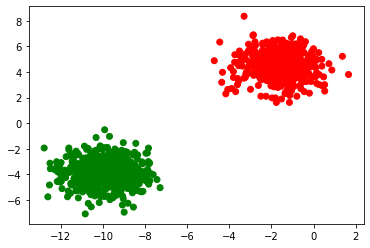

In [4]:
plt.scatter(features[:,0],features[:,1],c = labels,cmap=my_cmap)
plt.show()

In [5]:
## Split Test & Train Data 
X_train,X_test,Y_train,Y_test = train_test_split(features,labels,random_state=1)
print(X_train.shape,Y_train.shape)

(750, 2) (750,)


In [0]:
## Intializing Weights 
W1 = np.random.randn(2,2)
W2 = np.random.randn(1,2)

In [0]:
class Binary_Classification:
  def __init__(self,W1,W2):
    self.W1 = W1.copy() # (2,2)
    self.W2 = W2.copy() # (1,2)
    self.B1 = np.zeros((1,2))
    self.B2 = np.zeros((1,1))

  def sigmoid(self,X):
    return 1.0/(1.0+np.exp(-X))

  def grad_sigmoid(self,X):
    return X*(1-X)
  
  def forward_pass(self,X,threshold =0.5):

    self.A1 = np.matmul(X,self.W1) #(N,2)*(2,2) -> (N,2)
    self.H1 = self.sigmoid(self.A1) # (N,2)

    self.A2 = np.matmul(self.H1,self.W2.T) # (N,2)*(2,1) -> (N,1)
    self.H2 = self.sigmoid(self.A2) #(N,1)

    ## Setting Threshold 
    self.H2 = (self.H2>threshold).astype('int')
    return self.H2

  def grad(self,X,Y):
    self.forward_pass(X)
    Y = Y.reshape(-1,1)

    self.dL = (self.H2-Y)  #(N,1)-(N,1) -> (N,1)
    self.dA2 =  np.multiply(self.dL,self.grad_sigmoid(self.H2)) #(N,1)*(N,1) -> (N,1)


    self.dW2 = np.matmul(self.dA2.T,self.H1)  # (1,N) *(N,2) -> (1,2)
    self.dB2 = np.sum(self.dA2,axis=0).reshape(1,-1)


    self.dH1 = np.matmul(self.dA2,self.W2) #(N,1)*(1,2) -> (N,2)
    self.dA1 = np.multiply(self.dH1,self.grad_sigmoid(self.H1))  #(N,2) *(N,2) -> (N,2)

    self.dW1 = np.matmul(X.T,self.dA1)  # (2,N)*(N,2) -> (2,2)
    self.dB1 = np.sum(self.dA1,axis=0).reshape(1,-1)

  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False):
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      self.grad(X,Y)
      m = X.shape[0]
      self.W1 -= learning_rate * (self.dW1 / m)
      self.W2 -= learning_rate * (self.dW2 / m)
      self.B1 -= learning_rate * (self.dB1 / m)
      self.B2 -= learning_rate * (self.dB2 / m)
      
      # print("Epoch",i)
      # print("self.W1",self.W1)
      # print("self.W2",self.W2)
      # print("self.B1",self.B1)
      # print("self.B2",self.B2)
      # print("*"*100)

      if display_loss:
        Y_pred = self.predict(X)
        loss[i] =  mean_squared_error(Y,Y_pred)
        
      # if display_weight:
      #   weight_matrix = np.array([[self.b3, self.w5, self.w6, 
      #                              self.b4, self.w7, self.w8, 
      #                              self.b5, self.w9, self.w10, 
      #                              self.b6, self.w11, self.w12], 
      #                             [0, 0, 0,
      #                              self.b1, self.w1, self.w2,
      #                              self.b2, self.w3, self.w4, 
      #                              0, 0, 0]])
      #   weight_matrices.append(weight_matrix)

    loss_val_list = list(loss.values())
    if display_loss:
      plt.plot(loss_val_list)
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = self.forward_pass(X)
    return np.array(Y_pred).squeeze()







/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


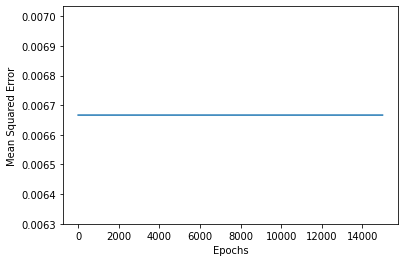

In [8]:
## Training 
obj = Binary_Classification(W1,W2)
obj.fit(X_train,Y_train,epochs=15000,learning_rate=0.01,display_loss=True)


In [9]:
Y_pred_train = obj.predict(X_train)
#Y_pred_vals_train = np.argmax(Y_pred_train,axis=1)

Y_pred_test = obj.predict(X_test)
#Y_pred_vals_test = np.argmax(Y_pred_test,axis=1)

train_accuracy = accuracy_score(Y_pred_train,Y_train)
test_accuracy = accuracy_score(Y_pred_test,Y_test)

print("train_accuracy",train_accuracy)
print("test accuracy",test_accuracy)

train_accuracy 0.9933333333333333
test accuracy 1.0


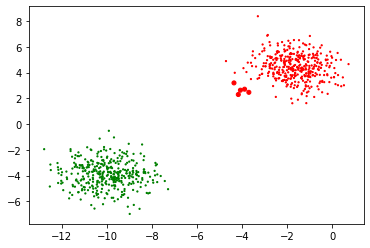

In [10]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=my_cmap, s=15*(np.abs(np.sign(Y_pred_train-Y_train))+.1))
plt.show()

In [11]:
a = [np.array([2,3]),np.array([4,5])]
b = [np.array([0,1]),np.array([1,0])]
c = np.matmul(a,b)
print(c)
print(c.shape)

[[3 2]
 [5 4]]
(2, 2)
